In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.interpolate import CubicSpline
from itertools import product
from sklearn.metrics import r2_score
import csv
from vmd import VMD

In [60]:
# adjusted R-squared
def r2_score_adjusted(y, y_pred, featurecount):
    n = len(y)
    return 1 - (1-r2_score(y, y_pred)) * (n-1)/(n-featurecount-1)

# AIC
def calculate_aic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    aic = n * np.log(sse / n) + 2 * k
    return aic

# BIC
def calculate_bic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    bic = n * np.log(sse / n) + k * np.log(n)
    return bic

# импорт временного ряда

In [61]:
# linux path
# path1 = './'
# path2 = '/'

# windows path
path1 = '.\\'
path2 = '\\'

In [62]:
index = list()
TS = list()
# Trend = list()
Noise = list()

for i in range(100):
    data = pd.read_csv(f"{path1}Cases{path2}t{i}_s{i}_n{i}.csv", decimal=',')
    df = pd.DataFrame(data['Combined'], dtype=float)
    TS.append(df.T.values[0])

    # df = pd.DataFrame(data['Trend'], dtype=float)
    # Trend.append(df.T.values[0])

    df = pd.DataFrame(data['Noise'], dtype=float)
    Noise.append(df.T.values[0])

index = df.index

In [63]:
# np.shape(TS)
# np.shape(Trend)
np.shape(Noise)

(100, 1500)

In [64]:
# TS[0]
# Trend[0]
Noise[0]

array([ 15.80772578, -27.09234282,  -5.48502065, ...,   7.55912342,
       -15.20213022,  -1.30478931], shape=(1500,))

In [65]:
len(TS)
# len(Trend)
len(Noise)

100

# тестовый анализ

In [66]:
alpha = 0
init = 1
DC = True
K = 3
tau = 0            #BY DEFAULT  
tol = 1e-6         #BY DEFAULT

u, u_hat, omega = VMD(TS[0], alpha, tau, K, DC, init, tol)

featurecount = 6

c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:71: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:68: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)


Text(0.5, 0, 'X')

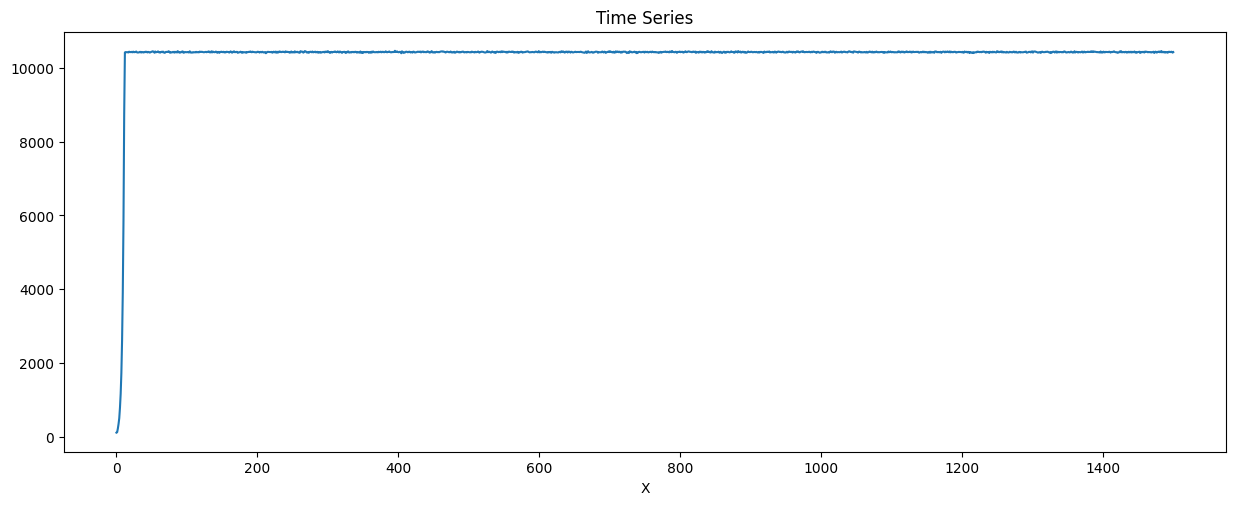

In [52]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(index, TS[0])
plt.title('Time Series')
plt.xlabel('X')

Text(0.5, 0, 'X')

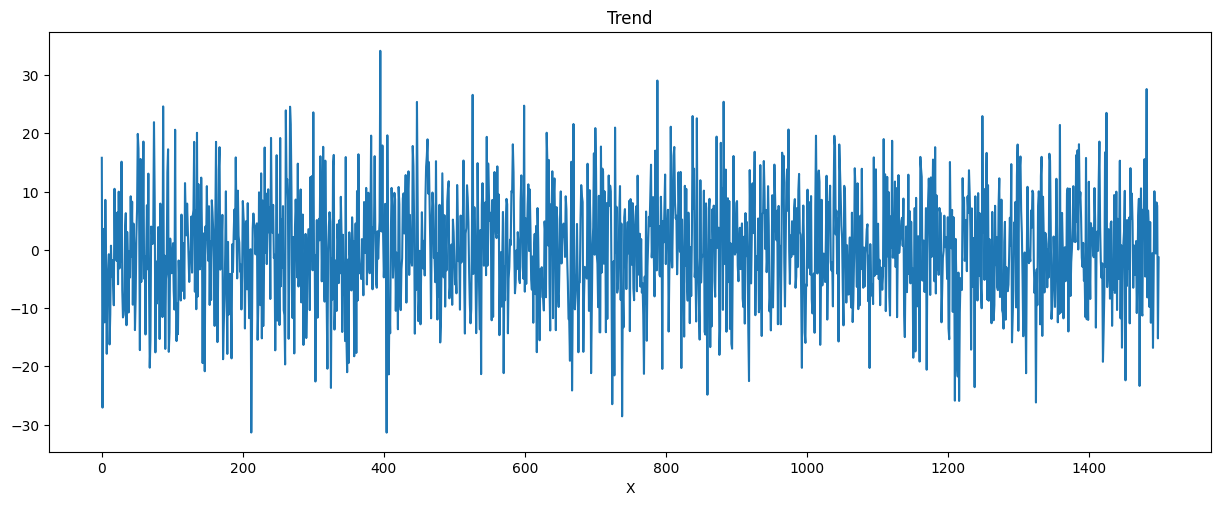

In [31]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(index, Noise[0])
plt.title('Trend')
plt.xlabel('X')

In [37]:
featurecount

6

In [58]:
r2_score(Noise[0], u[2].T)

-9.657882988500788e-05

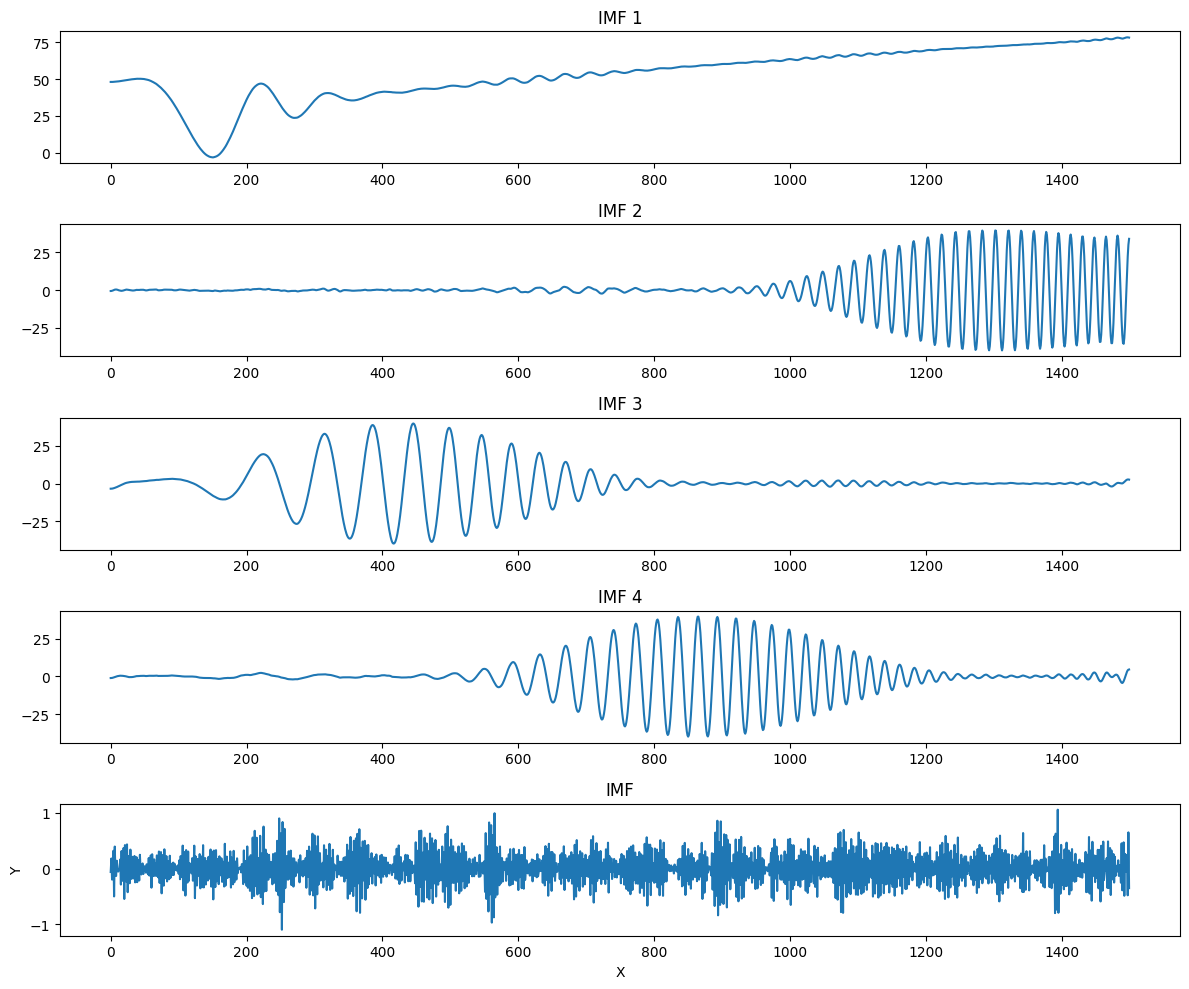

In [14]:
# plt.figure(figsize=(15,12))
# plt.subplot(2,1,1)
# plt.plot(index[0], TS[0])

fig, axs = plt.subplots(figsize=(12,10), nrows=K)

# axs[0].set(xlabel = 'date', ylabel='C')
# plt.subplot(2,2,1)
for i in range(K):
    axs[i].plot(index[0], u[i].T)
    axs[i].set_title(f'IMF {i+1}')

plt.title('IMF')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(['Оригинальный сигнал', 'Нижняя огибающая', 'Верхняя огибающая', 'Средняя огибающих'])

plt.tight_layout()

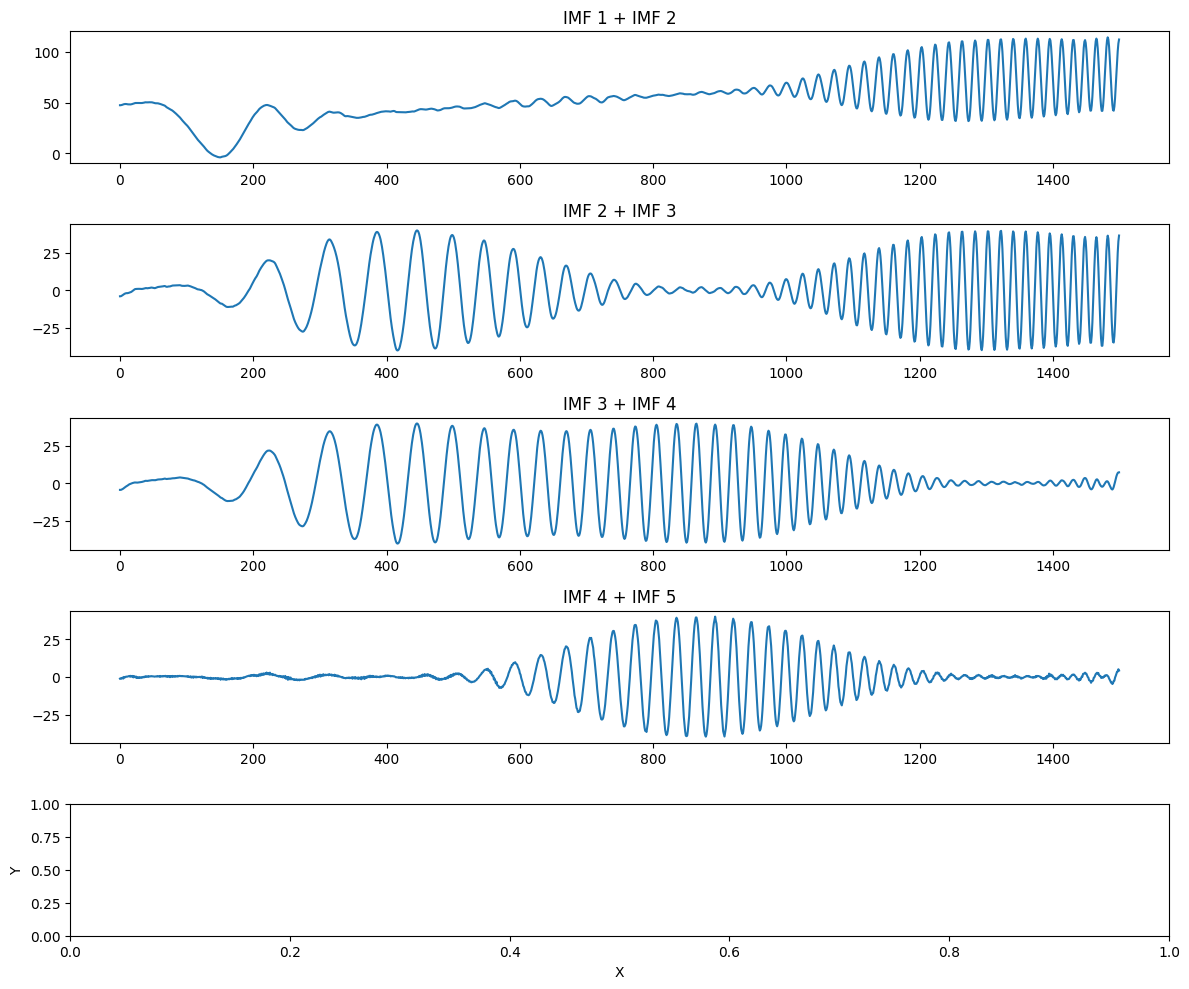

In [ ]:
# plt.figure(figsize=(15,12))
# plt.subplot(2,1,1)
# plt.plot(index[0], TS[0])

fig, axs = plt.subplots(figsize=(12,10), nrows=K-1)

# axs[0].set(xlabel = 'date', ylabel='C')
# plt.subplot(2,2,1)
for i in range((K-1)):
    axs[i].plot(index[0], u[i].T + u[i+1].T)
    axs[i].set_title(f'IMF {i+1} + IMF {i+2}')

# plt.title('IMF')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(['Оригинальный сигнал', 'Нижняя огибающая', 'Верхняя огибающая', 'Средняя огибающих'])

plt.tight_layout()

# декомпозиция временного ряда

In [ ]:
alpha = (0, 500, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000)
init = (0, 1, 2)
DC = True
K = 10

tau = 0            #BY DEFAULT  
tol = 1e-6         #BY DEFAULT

featurecount = 6
range_of_imfs = range(K)

In [ ]:
best_metriks = list()

best_r2_params = list()
best_r2_adj_params = list()
best_aic_params = list()
best_bic_params = list()

# для всех лчм
for ts_i in range(len(TS)):
    best_metriks.append({"Time Series": f"TS{ts_i+1}", "R2": -np.inf, "R2_Adj": -np.inf, "AIC" : np.inf, "BIC": np.inf})

    best_r2_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "R2", "alpha": 0, "init": 0, "IMFs" : "1"}) 
    best_r2_adj_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "R2_Adj", "alpha": 0, "init": 0, "IMFs" : "1"}) 
    best_aic_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "AIC", "alpha": 0, "init": 0, "IMFs" : "1"}) 
    best_bic_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "BIC", "alpha": 0, "init": 0, "IMFs" : "1"}) 
    
    # для всех наборов параметров
    for params_set in list(product(alpha, init)):
        u, u_hat, omega = VMD(f=TS[ts_i], alpha=params_set[0], tau=tau, K=K, DC=DC, init=params_set[1], tol=tol)
        # best_params = [{"Time Series": f"t{ts_i+1}" ,"alpha": params_set[0], "tau": tau, "K": params_set[1], "DC": params_set[2], "init": params_set[3], "tol": tol}]
        
        sum_of_imfs = 0
        for i_imfs in range_of_imfs:

            sum_of_imfs += u[i_imfs].T

            residual = TS[ts_i] - sum_of_imfs
            
            r2 = r2_score(Noise[ts_i], residual)
            r2_adj = r2_score_adjusted(Noise[ts_i], residual, featurecount)
            aic = calculate_aic(Noise[ts_i], residual, featurecount)
            bic = calculate_bic(Noise[ts_i], residual, featurecount)

            if (r2 > best_metriks[ts_i]["R2"]):
                best_metriks[ts_i]["R2"] = r2

                best_r2_params[ts_i]["alpha"] = params_set[0]
                best_r2_params[ts_i]["init"] = params_set[1]
                best_r2_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'

            if (r2_adj > best_metriks[ts_i]["R2_Adj"]):
                best_metriks[ts_i]["R2_Adj"] = r2_adj

                best_r2_adj_params[ts_i]["alpha"] = params_set[0]
                best_r2_adj_params[ts_i]["init"] = params_set[1]
                best_r2_adj_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'

            if (aic < best_metriks[ts_i]["AIC"]):
                best_metriks[ts_i]["AIC"] = aic

                best_aic_params[ts_i]["alpha"] = params_set[0]
                best_aic_params[ts_i]["init"] = params_set[1]
                best_aic_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'

            if (bic < best_metriks[ts_i]["BIC"]):
                best_metriks[ts_i]["BIC"] = bic

                best_bic_params[ts_i]["alpha"] = params_set[0]
                best_bic_params[ts_i]["init"] = params_set[1]
                best_bic_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'


c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:71: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:68: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)
c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:71: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:68: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)
c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:71: Ru

# метрики точности и параметры с выводом

In [70]:
for ts_i in range(len(TS)):
    best_metriks[ts_i]["BIC"] = format(best_metriks[ts_i]["BIC"], ".5f")
    best_metriks[ts_i]["AIC"] = format(best_metriks[ts_i]["AIC"], ".5f")
    best_metriks[ts_i]["R2_Adj"] = format(best_metriks[ts_i]["R2_Adj"], ".5f")
    best_metriks[ts_i]["R2"] = format(best_metriks[ts_i]["R2"], ".5f")

In [71]:
filename=f"{path1}Results{path2}Best_Metriks-Noise.csv"

fields = best_metriks[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_metriks[ts_i]])  # Write data rows

In [72]:
filename = f"{path1}Results{path2}Parameters-Noise.csv"

fields = best_r2_params[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_r2_params[ts_i]])  # Write data rows
        writer.writerows([best_r2_adj_params[ts_i]])  # Write data rows
        writer.writerows([best_aic_params[ts_i]])  # Write data rows
        writer.writerows([best_bic_params[ts_i]])  # Write data rows